Este proyecto consiste en un trabajo desarrollado en el módulo de Machine Learning de un Diplomado que desarrollé en la Universidad Autónoma de Python and Data Science.

# Indicaciones

## A. Objetivos de la tarea

El objetivo de esta tarea es desarrollar y aplicar un modelo de machine learning para predecir el número de personas que no asisten a abordar los vuelos de la aerolínea AeroML, basándose en distintos parámetros como ruta, día de la semana, hora del día, entre otros.

## B. Prerrequisitos para desarrollar la tarea

Antes de trabajar en esta tarea deben haber comprendido los contenidos de la unidad de sobre algoritmos de aprendizaje supervisado, especialmente la temática sobre árboles de decisión.

## C. Instrucciones para la elaboración de la tarea

REQUISITOS GENERALES

1. **Análisis exploratorio de los datos**<p>
2. **Preparación de los datos**<p>
3. **Extracción de atributos de la fecha**<p>
4. **Selección de variables**<p>
5. **Desarrollo del modelo**<p>
6. **Reflexione sobre el modelo**<p>
7. **Evaluación del modelo**<p>
8. **Reflexión final**

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
data = pd.read_csv("datos_vuelos_AeroML.csv", parse_dates=["fecha", "hora_salida"])

## TIP: Puede extraer información de las fechas de la siguiente manera:

```python

data['año'] = data['fecha'].dt.year

## Descripción de Variables en el Conjunto de Datos de Vuelos

### Variables Principales

1. **`id`**:  
   - Identificador único para cada registro.
   - Útil para indexación y combinación de datos.
  
2. **`fecha`**:  
   - Fecha del vuelo.
   - Importante para el análisis temporal y la identificación de patrones estacionales o tendencias.
  
3. **`numero_vuelo`**:  
   - Identificador único del vuelo.
   - Sirve para rastrear la eficiencia y popularidad de rutas específicas.
  
4. **`origen` y `destino`**:  
   - Aeropuertos de origen y destino.
   - Pueden usarse para analizar la demanda entre diferentes ubicaciones.

5. **`distancia`**:  
   - Distancia entre el origen y el destino.
   - Puede influir en la tarifa y el consumo de combustible.

6. **`capacidad`**:  
   - Número total de asientos en el avión.
   - Útil para calcular la tasa de ocupación y eficiencia del vuelo.

7. **`venta_usd`**:  
   - Ingresos totales del vuelo en dólares estadounidenses.
   - Un KPI clave para la rentabilidad.

8. **`agendados`**:  
   - Número total de reservas para el vuelo.
   - Indica la demanda y permite calcular la tasa de ocupación.

### Variables de Pasajeros

9. **`inasistencia`**:  
   - Número de pasajeros que no se presentaron.
   - Esto puede afectar la rentabilidad y requiere estrategias de overbooking cuidadosas.

10. **`vuelo_denegado`**:  
    - Número de pasajeros que no pudieron abordar debido al exceso de reservas.
    - Importante para evaluar la eficiencia del algoritmo de overbooking.

### Variables de Tarifas

11. **`tarifa_mediabaja`, `tarifa_alta`, `tarifa_mediaalta`, `tarifa_baja`**:  
    - Distribución de los tipos de tarifas adquiridas.
    - Esto puede ayudar a segmentar a los clientes y ajustar las estrategias de precios.

12. **`pax_freqflyer`**:  
    - Número de pasajeros que redimieron millas.
    - Importante para medir el compromiso del cliente.

13. **`agendado_grupal`**:  
    - Número de reservas grupales.
    - Estos suelen tener tarifas más bajas y podrían afectar la rentabilidad.

### Variables de Conexión

14. **`conexion_nacional`, `conexion_internacional`, `sin_conexion`**:  
    - Indican si el vuelo es parte de una conexión nacional, internacional o si los pasajeros no están en una conexión.
    - Esto puede afectar la logística y la planificación.

### Variables Adicionales

15. **`sin_stock`**:  
    - Días sin capacidad para vender más boletos.
    - Un indicador de alta demanda que podría usarse para ajustar tarifas o frecuencias de vuelo.

16. **`year`, `month`, `day`, `day_of_week`, `hour`**:  
    - Variables temporales que pueden ser útiles para modelar efectos estacionales o patrones diurnos.


# 1. Análisis Exploratorio y Preparación de Datos

Realice un análisis exploratorio y una preparación de datos que incluya:
- La gestión de valores faltantes o nulos (si existieran).
- La codificación de variables categóricas (si existieran).
- La normalización o estandarización de los datos.

**Comentarios:**
- Comente si existen datos faltantes, si hay valores que no tienen sentido, si hay outliers, etc.
- Describa las decisiones que tomó para la limpieza, imputación y/o transformación de los datos.

## Análisis exploratorio

Vemos las primeras 3 filas de nuestra data

In [396]:
data.head(3)

,id,fecha,numero_vuelo,origen,destino,distancia,inasistencia,vuelo_denegado,tarifa_mediabaja,tarifa_alta,...,pax_freqflyer,agendado_grupal,sin_stock,conexion_nacional,conexion_internacional,sin_conexion,hora_salida,capacidad,venta_usd,agendados
0,69922,2009-02-23,8942,ANF,SCL,1106,7,0,124.0,5,...,20,0,0,0,0,259.0,2024-06-20 21:15:00,168,8399.7,259.0
1,469723,2010-01-13,8941,SCL,ANF,1106,18,0,56.0,0,...,4,0,0,7,6,96.0,2024-06-20 18:15:00,174,8535.7,109.0
2,779308,2010-10-04,9128,ANF,SCL,1106,6,0,1.0,0,...,2,0,0,0,1,78.0,2024-06-20 17:26:00,218,3525.4,79.0


Verificamos cuantas filas y columna tiene nuestra data

In [397]:
data.shape

(18322, 22)

Vemos las columnas de nuestra data, los datos no nulos que tiene y el tipo de datos.

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18322 entries, 0 to 18321
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      18322 non-null  int64         
 1   fecha                   18322 non-null  datetime64[ns]
 2   numero_vuelo            18322 non-null  int64         
 3   origen                  18322 non-null  object        
 4   destino                 18322 non-null  object        
 5   distancia               18322 non-null  int64         
 6   inasistencia            18322 non-null  int64         
 7   vuelo_denegado          18322 non-null  int64         
 8   tarifa_mediabaja        17315 non-null  float64       
 9   tarifa_alta             18322 non-null  int64         
 10  tarifa_mediaalta        18322 non-null  int64         
 11  tarifa_baja             18322 non-null  int64         
 12  pax_freqflyer           18322 non-null  int64 

Vemos una pequeña estadística descriptiva de las columnas numéricas

In [399]:
data.describe()

,id,numero_vuelo,distancia,inasistencia,vuelo_denegado,tarifa_mediabaja,tarifa_alta,tarifa_mediaalta,tarifa_baja,pax_freqflyer,agendado_grupal,sin_stock,conexion_nacional,conexion_internacional,sin_conexion,capacidad,venta_usd,agendados
count,1.832200e+04,18322.000000,18322.0,18322.000000,18322.000000,17315.000000,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,18048.000000,18322.000000,18322.000000,17681.000000
mean,6.129082e+05,8960.270276,1106.0,8.327148,0.055180,50.279873,2.717607,4.352254,83.468781,11.110523,3.858804,0.072863,10.299858,4.090929,137.524601,185.937780,10767.573158,152.004864
std,3.838625e+05,325.001168,0.0,5.443675,0.578305,49.124795,5.704688,9.669340,40.563930,7.556938,12.973262,0.259919,18.130702,6.044964,64.266551,21.487634,5968.978632,64.448983
min,1.580000e+02,7926.000000,1106.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,193.700000,3.000000
25%,2.771338e+05,8933.000000,1106.0,5.000000,0.000000,2.000000,0.000000,0.000000,57.000000,6.000000,0.000000,0.000000,1.000000,1.000000,89.000000,174.000000,6517.850000,102.000000
50%,5.752390e+05,9126.000000,1106.0,8.000000,0.000000,36.000000,1.000000,1.000000,87.000000,10.000000,0.000000,0.000000,5.000000,2.000000,127.000000,174.000000,9595.400000,144.000000
75%,9.329845e+05,9138.000000,1106.0,11.000000,0.000000,97.000000,3.000000,4.000000,111.000000,15.000000,0.000000,0.000000,13.000000,5.000000,184.000000,218.000000,13753.200000,201.000000
max,1.350202e+06,9251.000000,1106.0,79.000000,20.000000,185.000000,109.000000,138.000000,276.000000,84.000000,158.000000,1.000000,181.000000,89.000000,366.000000,274.000000,52995.600000,384.000000


Identificamos cuantos valores únicos contiene cada columna

In [400]:
data.nunique()

id                        18322
fecha                      1072
numero_vuelo                125
origen                        2
destino                       2
distancia                     1
inasistencia                 60
vuelo_denegado               16
tarifa_mediabaja            177
tarifa_alta                  68
tarifa_mediaalta             90
tarifa_baja                 230
pax_freqflyer                60
agendado_grupal             125
sin_stock                     2
conexion_nacional           151
conexion_internacional       74
sin_conexion                334
hora_salida                1164
capacidad                    17
venta_usd                 17450
agendados                   329
dtype: int64

Revisamos los Null que tiene nuestro DataFrame

In [401]:
data.isnull().sum()

id                           0
fecha                        0
numero_vuelo                 0
origen                       0
destino                      0
distancia                    0
inasistencia                 0
vuelo_denegado               0
tarifa_mediabaja          1007
tarifa_alta                  0
tarifa_mediaalta             0
tarifa_baja                  0
pax_freqflyer                0
agendado_grupal              0
sin_stock                    0
conexion_nacional            0
conexion_internacional       0
sin_conexion               274
hora_salida                  5
capacidad                    0
venta_usd                    0
agendados                  641
dtype: int64

Verificamos si existen valores duplicados

In [402]:
data.duplicated().sum()

0

## Preparación de los datos

### Paso 1: Eliminar variables que de inicio no son necesarias como también valores duplicados si es que los hay

La variables distancia solo tiene 1 valor que se repite en toda la columna, por lo cual no es una columna que nos aporte al modelo y será eliminada.

In [403]:
#Verificamos nuevamente que la columna distancia solo tiene 1 solo valor
data['distancia'].nunique()

1

In [404]:
#Observamos cual es el dato que se repite
data["distancia"].value_counts()

1106    18322
Name: distancia, dtype: int64

In [405]:
#Solo para ver el cambio vemos cuantas columnas tenemos antes de eliminar "Distancia"
data.shape

(18322, 22)

In [406]:
#Eliminamos nuestra columna
data = data.drop(columns=['distancia'])

In [407]:
#Ahora verificamos que haya una columna menos
data.shape

(18322, 21)

Las columnas origen y destino si las vemos en más detalle nos daremos cuenta de que solo tienen 2 origenes y 2 destinos, por lo cual podemos eliminar una de ellas ya que tener ambas es redundante

In [408]:
data["origen"].value_counts()

SCL    9184
ANF    9138
Name: origen, dtype: int64

In [409]:
data["destino"].value_counts()

ANF    9184
SCL    9138
Name: destino, dtype: int64

In [410]:
data = data.drop(columns=['destino'])

In [411]:
data.shape

(18322, 20)

La columna id, no nos aporta información ya que existe un id único por cada valor

In [412]:
data = data.drop(columns=['id'])
data.shape

(18322, 19)

La columna , no nos aporta mucha información ya que el dato esta muy atomizado

In [413]:
data = data.drop(columns=['venta_usd'])
data.shape

(18322, 18)

Por ahora eliminaremos solo estas columnas, pero podemos volver a este paso posteriormente.

### Paso 2: Tratamiento de valores Nulos

Primero trataremos los valores nulos de sin_conexion ya que con esta variable podemos obtener algunas de las demás. Primero veremos como se distribuyen los datos de esta variable.

<AxesSubplot:ylabel='Frequency'>

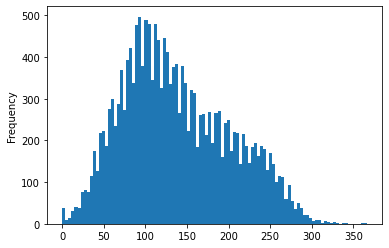

In [414]:
data["sin_conexion"].plot(kind="hist", bins=100)

Aunque no es una distribución normal, es bastante similar por lo cual reemplazaremos los datos nulos con la mediana.

In [415]:
data['sin_conexion'] = data['sin_conexion'].fillna(data['sin_conexion'].median())
data.isnull().sum()

fecha                        0
numero_vuelo                 0
origen                       0
inasistencia                 0
vuelo_denegado               0
tarifa_mediabaja          1007
tarifa_alta                  0
tarifa_mediaalta             0
tarifa_baja                  0
pax_freqflyer                0
agendado_grupal              0
sin_stock                    0
conexion_nacional            0
conexion_internacional       0
sin_conexion                 0
hora_salida                  5
capacidad                    0
agendados                  641
dtype: int64

Si nos damos cuenta la variable de 
agendados = conexion_internacional + conexion_nacional + sin_conexion

Por lo cual, de esta forma podemos rellenar los valores null

In [416]:
data['agendados']=data["conexion_internacional"] + data["conexion_nacional"] + data["sin_conexion"]
data.isnull().sum()

fecha                        0
numero_vuelo                 0
origen                       0
inasistencia                 0
vuelo_denegado               0
tarifa_mediabaja          1007
tarifa_alta                  0
tarifa_mediaalta             0
tarifa_baja                  0
pax_freqflyer                0
agendado_grupal              0
sin_stock                    0
conexion_nacional            0
conexion_internacional       0
sin_conexion                 0
hora_salida                  5
capacidad                    0
agendados                    0
dtype: int64

Si nos damos cuenta la variable de 
agendados = tarifa_mediabaja + tarifa_alta + tarifa_mediaalta + tarifa_baja + pax_freqflyer

Por lo cual, si a agendados le restamos las demás columnas podemos recuperar algunos valores nulos de tarifa_mediabaja

In [417]:
data['tarifa_mediabaja'] = data['agendados'] - data['tarifa_alta']-data['tarifa_mediaalta']-data['tarifa_baja']-data['pax_freqflyer']
data.isnull().sum()

fecha                     0
numero_vuelo              0
origen                    0
inasistencia              0
vuelo_denegado            0
tarifa_mediabaja          0
tarifa_alta               0
tarifa_mediaalta          0
tarifa_baja               0
pax_freqflyer             0
agendado_grupal           0
sin_stock                 0
conexion_nacional         0
conexion_internacional    0
sin_conexion              0
hora_salida               5
capacidad                 0
agendados                 0
dtype: int64

Por último solo nos queda la columna hora_salida, pero al ser tan bajo el número de valores nulos comparado con la cantidad de datos que tenemos, simplemente eliminaremos estos datos null.

In [418]:
data = data.dropna(subset=['hora_salida'])
data.shape

(18317, 18)

De esta manera tendríamos nuestra data limpia de valores nulos, como lo podemos comprobar a continuación.

In [419]:
data.isnull().sum()

fecha                     0
numero_vuelo              0
origen                    0
inasistencia              0
vuelo_denegado            0
tarifa_mediabaja          0
tarifa_alta               0
tarifa_mediaalta          0
tarifa_baja               0
pax_freqflyer             0
agendado_grupal           0
sin_stock                 0
conexion_nacional         0
conexion_internacional    0
sin_conexion              0
hora_salida               0
capacidad                 0
agendados                 0
dtype: int64

Por último eliminaremos al columna agendados, ya que esta información está de igual manera contenida por la suma de las demás variables.

In [420]:
data = data.drop(columns=['agendados'])
data.shape

(18317, 17)

### Paso 3: Tratamiendo de Outliers

Veremos en primer lugar que no hayan valores fuera de lo normal, como valores muy grandes o valores negativos que no corresponden a ningúna variable en nuestro dataset. De manera rápida lo podemos volver a revisar con un análisis descriptivo.

In [421]:
data.describe()

,numero_vuelo,inasistencia,vuelo_denegado,tarifa_mediabaja,tarifa_alta,tarifa_mediaalta,tarifa_baja,pax_freqflyer,agendado_grupal,sin_stock,conexion_nacional,conexion_internacional,sin_conexion,capacidad
count,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000,18317.000000
mean,8960.542938,8.328875,0.055195,50.105749,2.716657,4.349948,83.477589,11.111536,3.859857,0.072883,10.300704,4.091718,137.369056,185.935907
std,324.626162,5.443253,0.578383,49.038492,5.703460,9.664120,40.552322,7.556994,12.974876,0.259952,18.132661,6.045588,63.773749,21.486900
min,7926.000000,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,8933.000000,5.000000,0.000000,2.000000,0.000000,0.000000,57.000000,6.000000,0.000000,0.000000,1.000000,1.000000,89.000000,174.000000
50%,9126.000000,8.000000,0.000000,36.000000,1.000000,1.000000,87.000000,10.000000,0.000000,0.000000,5.000000,2.000000,127.000000,174.000000
75%,9138.000000,11.000000,0.000000,96.000000,3.000000,4.000000,111.000000,15.000000,0.000000,0.000000,13.000000,5.000000,183.000000,218.000000
max,9251.000000,79.000000,20.000000,185.000000,109.000000,138.000000,276.000000,84.000000,158.000000,1.000000,181.000000,89.000000,366.000000,274.000000


Podemos ver que en tarifa_mediabaja nos encontramos con valores negativos, esto no debería ser así, pero  puede haber sucedido al reemplazar sin_conexion con la media, las sumas posteriores no calzaran especificamente. Por lo cual eliminaremos estos valores negativos.

<AxesSubplot:ylabel='Frequency'>

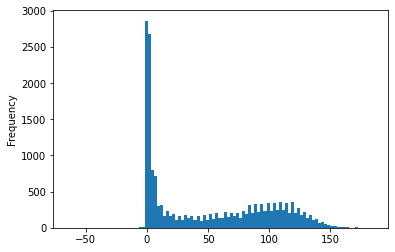

In [422]:
data["tarifa_mediabaja"].plot(kind="hist", bins=100)

In [423]:
valores_negativos = data['tarifa_mediabaja'] < 0
valores_negativos.sum()

46

In [424]:
data= data[~valores_negativos]
data.shape

(18271, 17)

<AxesSubplot:ylabel='Frequency'>

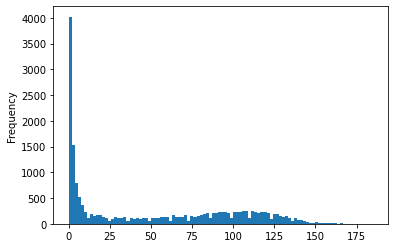

In [425]:
data["tarifa_mediabaja"].plot(kind="hist", bins=100)

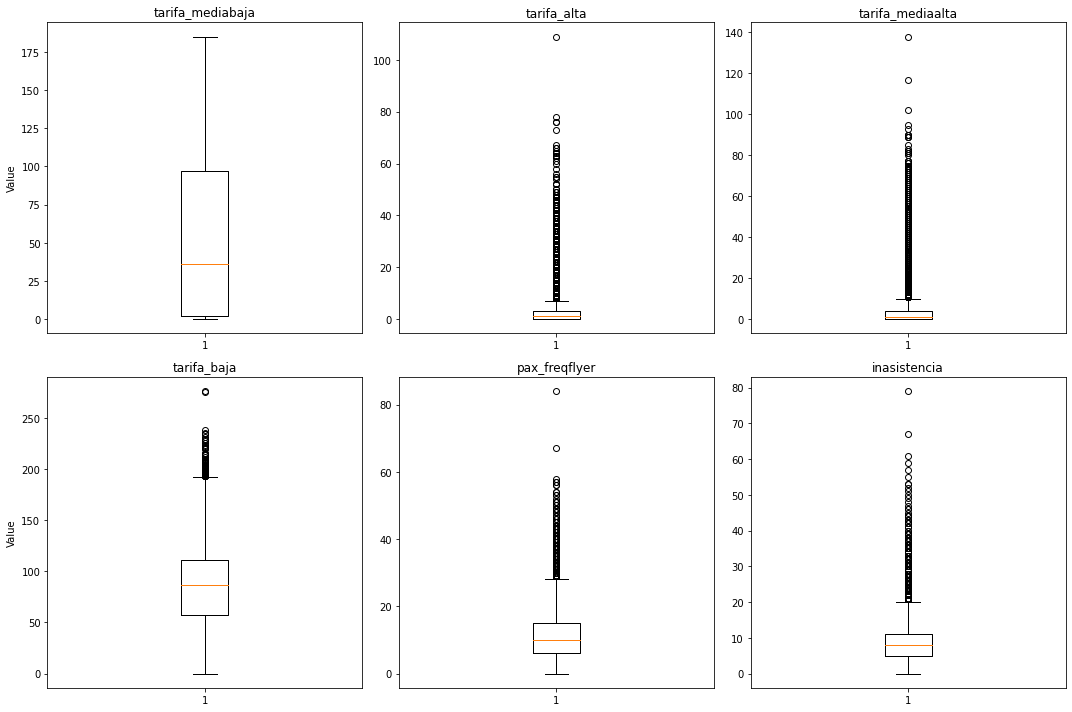

In [426]:
# Crear subplots para los diagramas de caja
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Diagrama de caja para tarifa_mediabaja
axs[0, 0].boxplot(data["tarifa_mediabaja"])
axs[0, 0].set_title('tarifa_mediabaja')
axs[0, 0].set_ylabel('Value')  # Nombre del eje y

# Diagrama de caja para tarifa_alta 
axs[0, 1].boxplot(data["tarifa_alta"])
axs[0, 1].set_title('tarifa_alta')

# Diagrama de caja para tarifa_mediaalta 
axs[0, 2].boxplot(data["tarifa_mediaalta"])
axs[0, 2].set_title('tarifa_mediaalta')

# Diagrama de caja para tarifa_mediabaja
axs[1, 0].boxplot(data["tarifa_baja"])
axs[1, 0].set_title('tarifa_baja')
axs[1, 0].set_ylabel('Value')  # Nombre del eje y

# Diagrama de caja para pax_freqflyer 
axs[1, 1].boxplot(data["pax_freqflyer"])
axs[1, 1].set_title('pax_freqflyer')

# Diagrama de caja para inasistencia
axs[1, 2].boxplot(data["inasistencia"])
axs[1, 2].set_title('inasistencia')

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()

In [427]:
data['tarifa_alta'].value_counts()

0     8450
1     2954
2     1746
3     1148
4      792
      ... 
61       1
56       1
60       1
73       1
65       1
Name: tarifa_alta, Length: 68, dtype: int64

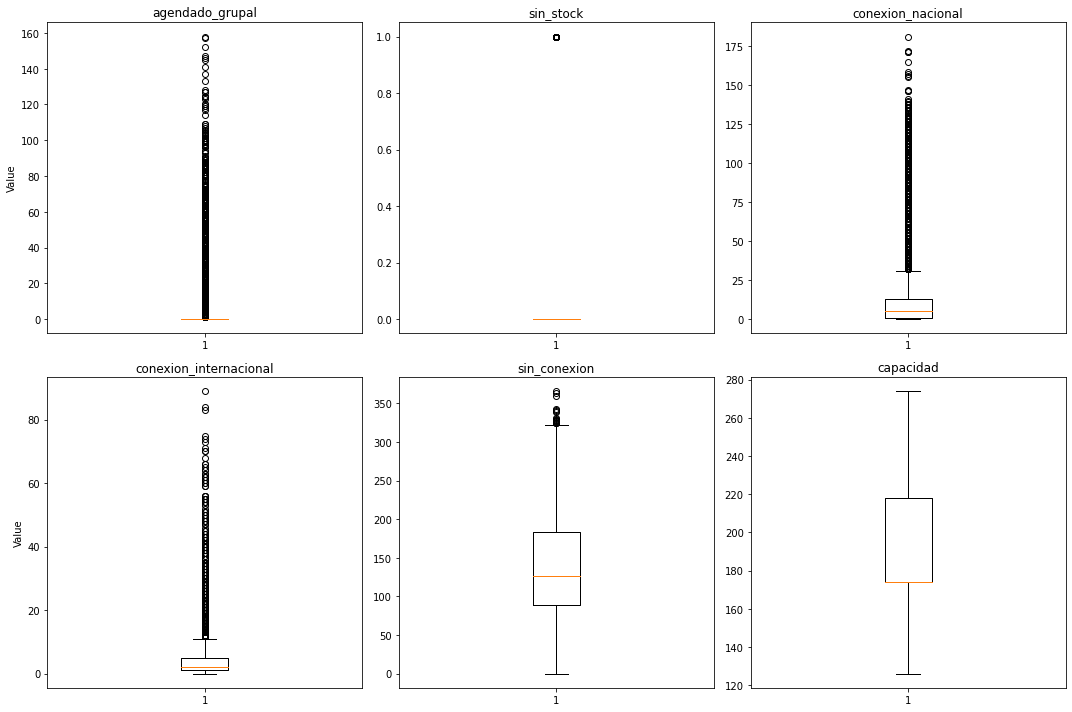

In [428]:
# Crear subplots para los diagramas de caja
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Diagrama de caja para tarifa_mediabaja
axs[0, 0].boxplot(data["agendado_grupal"])
axs[0, 0].set_title('agendado_grupal')
axs[0, 0].set_ylabel('Value')  # Nombre del eje y

# Diagrama de caja para tarifa_alta 
axs[0, 1].boxplot(data["sin_stock"])
axs[0, 1].set_title('sin_stock')

# Diagrama de caja para tarifa_mediaalta 
axs[0, 2].boxplot(data["conexion_nacional"])
axs[0, 2].set_title('conexion_nacional')

# Diagrama de caja para tarifa_mediabaja
axs[1, 0].boxplot(data["conexion_internacional"])
axs[1, 0].set_title('conexion_internacional')
axs[1, 0].set_ylabel('Value')  # Nombre del eje y

# Diagrama de caja para pax_freqflyer 
axs[1, 1].boxplot(data["sin_conexion"])
axs[1, 1].set_title('sin_conexion')

# Diagrama de caja para inasistencia
axs[1, 2].boxplot(data["capacidad"])
axs[1, 2].set_title('capacidad')

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()

In [429]:
data['sin_stock'].value_counts()

0    16940
1     1331
Name: sin_stock, dtype: int64

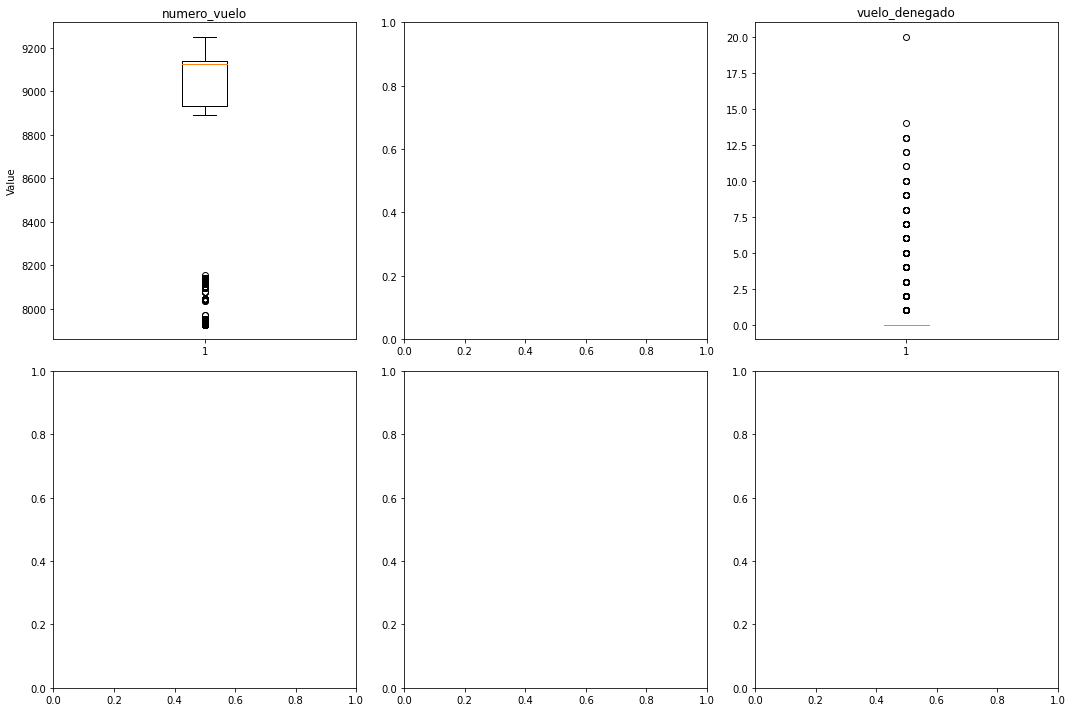

In [430]:
# Crear subplots para los diagramas de caja
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Diagrama de caja para tarifa_mediabaja
axs[0, 0].boxplot(data["numero_vuelo"])
axs[0, 0].set_title('numero_vuelo')
axs[0, 0].set_ylabel('Value')  # Nombre del eje y

# Diagrama de caja para tarifa_mediaalta 
axs[0, 2].boxplot(data["vuelo_denegado"])
axs[0, 2].set_title('vuelo_denegado')


# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()

### Paso 4: Convertir variables categóricas a variables Dummies (Antes extraer fecha)

Extraemos los atributos de la fecha

In [431]:
data['fecha'] = pd.to_datetime(data['fecha'])
data["week_day"] = data["fecha"].dt.dayofweek
data["mes"] = data["fecha"].dt.month
data["hora"] = data["hora_salida"].dt.hour

data.drop(columns=["fecha", "hora_salida"], inplace=True)

In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18271 entries, 0 to 18321
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   numero_vuelo            18271 non-null  int64  
 1   origen                  18271 non-null  object 
 2   inasistencia            18271 non-null  int64  
 3   vuelo_denegado          18271 non-null  int64  
 4   tarifa_mediabaja        18271 non-null  float64
 5   tarifa_alta             18271 non-null  int64  
 6   tarifa_mediaalta        18271 non-null  int64  
 7   tarifa_baja             18271 non-null  int64  
 8   pax_freqflyer           18271 non-null  int64  
 9   agendado_grupal         18271 non-null  int64  
 10  sin_stock               18271 non-null  int64  
 11  conexion_nacional       18271 non-null  int64  
 12  conexion_internacional  18271 non-null  int64  
 13  sin_conexion            18271 non-null  float64
 14  capacidad               18271 non-null

Ahora pasaremos a Generar One Hot Encoding o Convertir a variables dummies las variables categóricas

In [433]:
data = pd.get_dummies(data, columns=["week_day", "mes", "hora"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18271 entries, 0 to 18321
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   numero_vuelo            18271 non-null  int64  
 1   origen                  18271 non-null  object 
 2   inasistencia            18271 non-null  int64  
 3   vuelo_denegado          18271 non-null  int64  
 4   tarifa_mediabaja        18271 non-null  float64
 5   tarifa_alta             18271 non-null  int64  
 6   tarifa_mediaalta        18271 non-null  int64  
 7   tarifa_baja             18271 non-null  int64  
 8   pax_freqflyer           18271 non-null  int64  
 9   agendado_grupal         18271 non-null  int64  
 10  sin_stock               18271 non-null  int64  
 11  conexion_nacional       18271 non-null  int64  
 12  conexion_internacional  18271 non-null  int64  
 13  sin_conexion            18271 non-null  float64
 14  capacidad               18271 non-null

Ahora lo haremos con la variable origen, pero como nos dará dos columnas, podemos eliminar una de ellas ya que es información que ya está contenida en la otra.

In [434]:
data = pd.get_dummies(data, columns=["origen"])
data.drop(columns=["origen_ANF"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18271 entries, 0 to 18321
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   numero_vuelo            18271 non-null  int64  
 1   inasistencia            18271 non-null  int64  
 2   vuelo_denegado          18271 non-null  int64  
 3   tarifa_mediabaja        18271 non-null  float64
 4   tarifa_alta             18271 non-null  int64  
 5   tarifa_mediaalta        18271 non-null  int64  
 6   tarifa_baja             18271 non-null  int64  
 7   pax_freqflyer           18271 non-null  int64  
 8   agendado_grupal         18271 non-null  int64  
 9   sin_stock               18271 non-null  int64  
 10  conexion_nacional       18271 non-null  int64  
 11  conexion_internacional  18271 non-null  int64  
 12  sin_conexion            18271 non-null  float64
 13  capacidad               18271 non-null  int64  
 14  week_day_0              18271 non-null

### Paso 5: Normalización de datos numéricos 

Por último de forma sencilla normalizaremos todas las variables numéricas (es decir de 0 a 1) de nuestro data

In [435]:
# Seleccionar las columnas numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Normalización de los datos numéricos
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

data.describe()

"\n# Seleccionar las columnas numéricas\nnumeric_cols = data.select_dtypes(include=['int64', 'float64']).columns\n\n# Normalización de los datos numéricos\nscaler = MinMaxScaler()\ndata[numeric_cols] = scaler.fit_transform(data[numeric_cols])\n\ndata.describe()\n"

# 2. Selección de Variables

Elija las variables más relevantes para predecir la inasistencia. Explique las razones para dejar algunas características fuera.

**Comentarios:**
- Describa las variables que eligió y por qué.

In [436]:
# Seleccionar las características y la variable objetivo
X = data.drop(columns=['inasistencia'])
y = data['inasistencia']

# 3. Desarrollo y Evaluación del Modelo

Desarrolle uno o más modelos de regresión y evalúe el desempeño de los modelos mediante el error absoluto medio (MAE). Interprete correctamente los resultados y su impacto en la precisión del modelo.

**Comentarios:**
- Describa el modelo que eligió y por qué.
- Comente sobre los resultados obtenidos del MAE y su interpretación.
- Elija otra métrica de evaluación, interprete los resultados y compare con el MAE.

In [444]:
# Primero deberíamos seleccionar las características y la variable objetivo
# Pero ya fueron seleccionadas en el paso anterior

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = linear_model.predict(X_test)

# Calcular métricas
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)

print(f'Linear Regression R2: {linear_r2}')
print(f'Linear Regression MAE: {linear_mae}')

Linear Regression R2: 0.10750962842024459
Linear Regression MAE: 3.762162238698053


In [445]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydotplus

def display_tree(dt):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())


# Primero deberíamos seleccionar las características y la variable objetivo
# Pero ya fueron seleccionadas en el paso anterior

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

tree = DecisionTreeRegressor(random_state=21, max_depth=20)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)


tree_r2 = r2_score(y_test, y_pred)
tree_mae = mean_absolute_error(y_test, y_pred)

print(f'Decision Tree R2: {tree_r2}')
print(f'Decision Tree MAE: {tree_mae}')

Decision Tree R2: -0.40876323441578144
Decision Tree MAE: 4.602796004034545


In [446]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


# Primero deberíamos seleccionar las características y la variable objetivo
# Pero ya fueron seleccionadas en el paso anterior


# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test_scaled)

# Calcular métricas
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)

print(f'Random Forest R2: {rf_r2}')
print(f'Random Forest MAE: {rf_mae}')

Random Forest R2: 0.17214368549093106
Random Forest MAE: 3.6545554035567718


# 4. Reflexión Final

Reflexione sobre el proceso de desarrollo del modelo, las dificultades encontradas, las decisiones tomadas y la importancia de la evaluación y selección de modelos en la creación de modelos de aprendizaje automático precisos y confiables.

**Comentarios:**
- Reflexione sobre las decisiones tomadas durante el desarrollo del modelo.
- Comente las dificultades encontradas y cómo las abordó.
- Discuta la importancia de la evaluación y selección de modelos.

In [438]:
# SU CODIGO AQUI